In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg

C:\Users\wpson\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_csv("harvest_data_plus_environmental_data.csv")

In [3]:
data = data[data['SEX'] == 'M'] # subsetting data to just males

## EDA:

Text(0.5, 1.0, 'Average age of male white-tailed by training site')

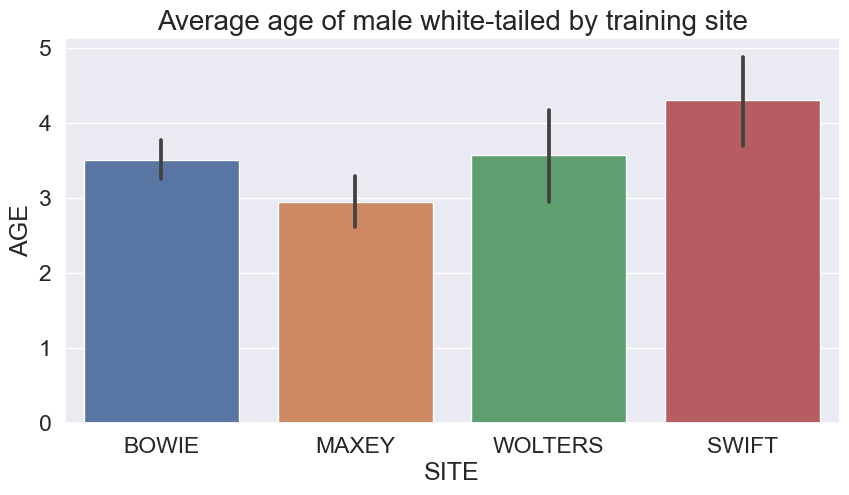

In [4]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'SITE', y='AGE', data = data, ci=95)
plt.title('Average age of male white-tailed by training site', fontsize=20)

Text(0.5, 1.0, 'Number of males harvested by year')

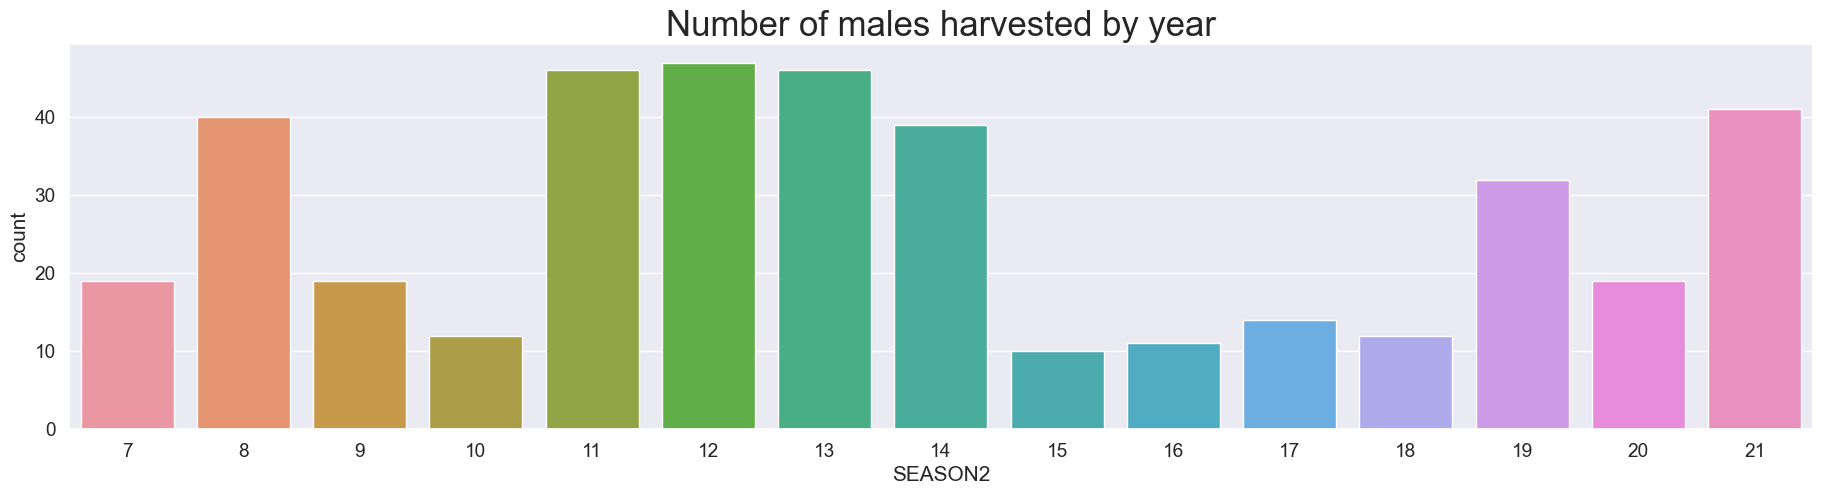

In [5]:
sns.set(rc={"figure.figsize":(22.5, 5)}, font_scale = 1.25) 
sns.countplot(x = 'SEASON2', data = data)
plt.title('Number of males harvested by year', fontsize=25) 
## the x-axis values correspond to year (e.g., '7' = 2007, '10' = 2010, and so on.)

Text(0.5, 1.0, 'Scatterplot with trend line of male body mass (bm.kg) by age')

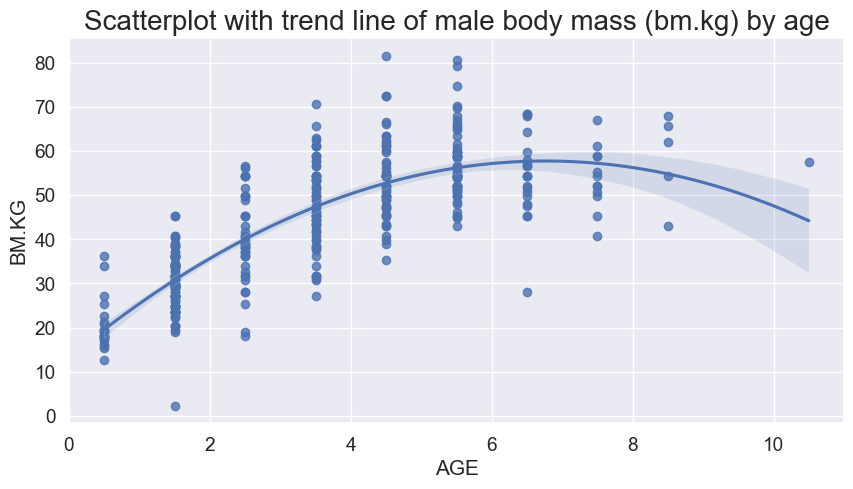

In [6]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.25) 
sns.regplot(x = 'AGE', y = 'BM.KG', data = data, order=2)
plt.title('Scatterplot with trend line of male body mass (bm.kg) by age', fontsize=20)

Notice the positive, curvilinear relationship between age and body mass.  However, as males reach about 7 years, the rate of decrease in body mass accelerates (i.e., Body mass growth of males beyond 7 years plateaus).

In [7]:
data.drop(['PREFIX-ID','DATE','ID','SEX','DATE+#','a,b,etc.','DATE TAKEN','SEASON','SEASONCAT','LIVE.BM.KG',
           'LIVE WEIGHT','BM.LB','POINTS.L','POINTS.R','SPREAD.IN','SPREAD.MM','BASAL.CIR.L.IN',
           'BASAL.CIR.L.MM','BASAL.CIR.R.IN','BASAL.CIR.R.MM ','BEAM.L.IN','BASAL.T.MM','BEAM.L.MM',
           'BEAM.R.IN','BEAM.R.MM','LACTATION','NOTES','BEAM.T.MM'],axis=1, inplace=True)

In [8]:
data['SITE'].replace(['BOWIE', 'SWIFT','MAXEY','WOLTERS'],[0, 1, 2, 3], inplace=True)

In [9]:
data.dropna(subset=['BM.KG','AGE'],inplace=True)

In [10]:
print("Total NaN in dataframe :" , data.isna().sum().sum())
print("Total NaN in each column of the dataframe")
na = []
for index, col in enumerate(data):
    na.append((index, data[col].isna().sum())) 
na_sorted = na.copy()
na_sorted.sort(key = lambda x: x[1], reverse = True) 

for i in range(len(data.columns)):
    print(data.columns[na_sorted[i][0]],":", na_sorted[i][1], "NaN")

Total NaN in dataframe : 0
Total NaN in each column of the dataframe
SEASON2 : 0 NaN
SITE : 0 NaN
AGE : 0 NaN
BM.KG : 0 NaN
rain_lag_0 : 0 NaN
rain_lag_1 : 0 NaN
rain_lag_2 : 0 NaN
rain_lag_3 : 0 NaN
rain_lag_4 : 0 NaN
rain_lag_5 : 0 NaN


In [11]:
data = data[data['AGE'] > 4.5] # subsetting data to only include mature males older that are older than 4.5 years.

Text(0.5, 1.0, '')

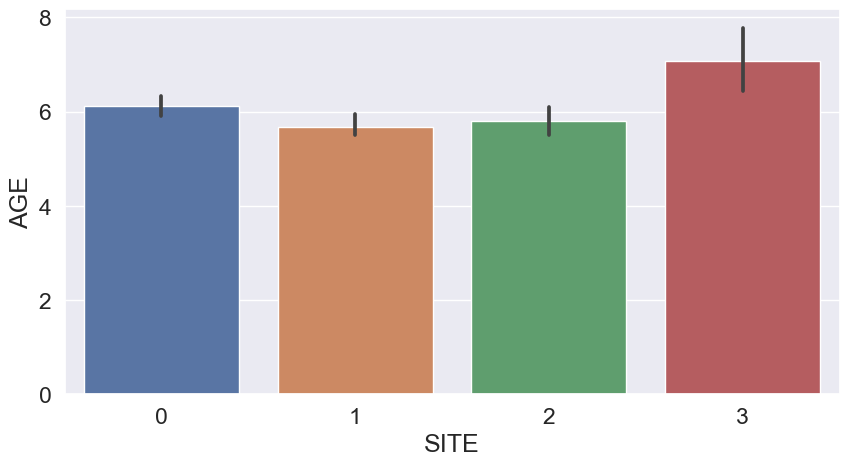

In [12]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.5) 
sns.barplot(x = 'SITE', y='AGE', data = data, ci=95)
plt.title('', fontsize=25)

Text(0.5, 1.0, 'Scatterplot with trend line of male body mass by age')

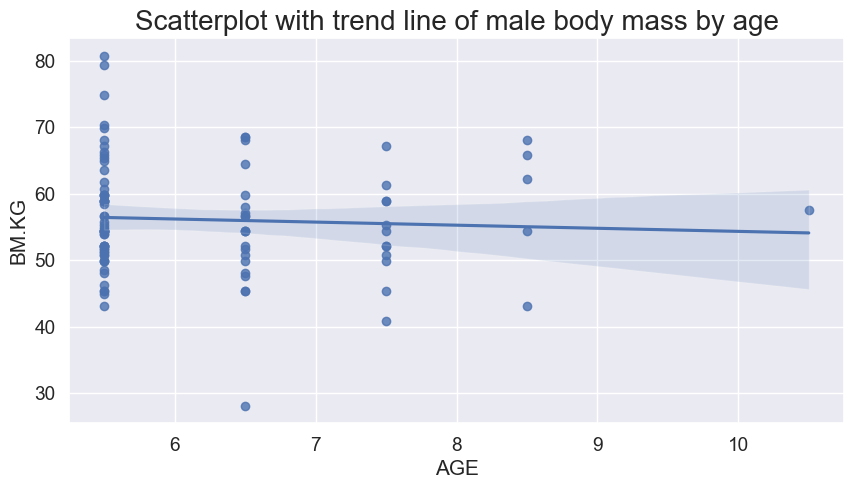

In [13]:
sns.set(rc={"figure.figsize":(10, 5)}, font_scale = 1.25) 
sns.regplot(x = 'AGE', y = 'BM.KG', data = data, order=1)
plt.title('Scatterplot with trend line of male body mass by age', fontsize=20)

In [14]:
X = data.drop(['BM.KG'], axis=1)
y = data['BM.KG']

## Modeling the dataset:

In [15]:
rf = RandomForestRegressor(random_state = 1)
gb = GradientBoostingRegressor(random_state = 1)
xgbr = xg.XGBRegressor(random_state = 1)

### A. Model selection: cross-validation

* KFold cross validation to evaluate model performance and select best performing model

In [16]:
scores_rf = cross_val_score(rf,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_rf = (-scores_rf)
print("MAE values: ", mae_rf)
print("MAE average: ", np.mean(mae_rf))

MAE values:  [7.23881708 3.81041572 5.06931492 5.17512373 4.92350934 4.82069758
 8.02497086 5.03476706 6.90329638 8.23301979]
MAE average:  5.9233932477871925


In [17]:
scores_gb = cross_val_score(gb,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_gb = (-scores_gb)
print("MAE values: ", mae_gb)
print("MAE average: ", np.mean(mae_gb))

MAE values:  [7.49436791 3.89950712 5.34216727 5.61493668 5.59868542 5.87491486
 7.62232728 6.87088519 7.68741745 8.18771939]
MAE average:  6.419292856732703


In [18]:
scores_xgbr = cross_val_score(xgbr,X,y,scoring="neg_mean_absolute_error",cv=10)
mae_xgbr = (-scores_xgbr)
print("MAE values: ", mae_xgbr)
print("MAE average: ", np.mean(mae_xgbr))

MAE values:  [ 8.34011186  4.06070496  6.27622114  4.27601096  5.4196872   6.76016754
  7.18483464  6.72198273  7.08085013 10.15647693]
MAE average:  6.627704809163771


In [19]:
fitted_model = rf.fit(X,y)

### B. Important features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'rain_lag_4'),
  Text(1, 0, 'rain_lag_1'),
  Text(2, 0, 'SEASON2'),
  Text(3, 0, 'AGE'),
  Text(4, 0, 'rain_lag_0')])

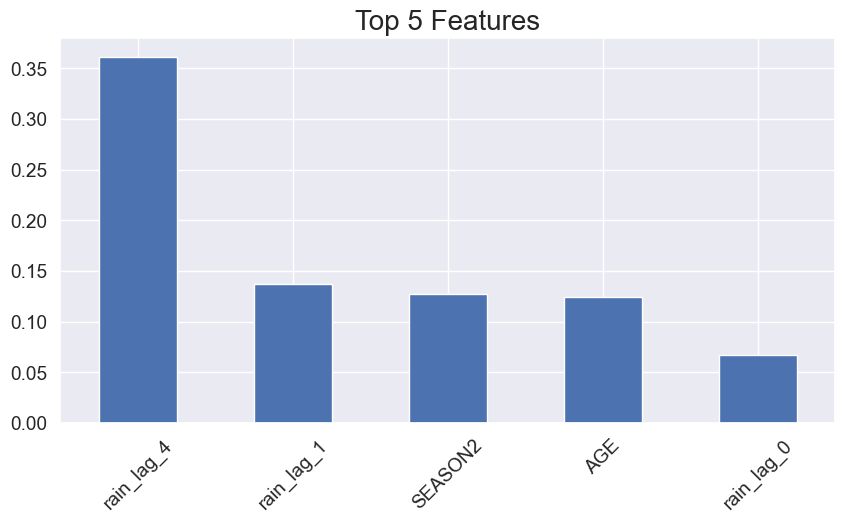

In [20]:
feat_importances = pd.Series(fitted_model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='bar')
titlefont = 20
plt.title("Top 5 Features", fontdict={'fontsize':titlefont})
plt.xticks(rotation = 45) 